# Library Imports

In [1]:
import sys
import os
directory_path = os.path.abspath(os.path.join('..'))
utils_path = os.path.abspath(os.path.join('../utils'))
if directory_path not in sys.path:
    sys.path.append(directory_path)
    sys.path.append(utils_path)

In [2]:
import pandas as pd
import numpy as np
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from utils.Validator import *
pd.set_option('display.max_columns', None)  
sns.set(rc={'figure.figsize':(11.7,8.27)})

# Load + Transform

## Users

In [3]:
df_users = pd.read_csv(r"../data/raw/Users.csv",dtype=str)
df_users.head()

,Id,UserName,DisplayName,RegisterDate,PerformanceTier
0,1,kaggleteam,Kaggle Team,03/24/2011,5
1,368,antgoldbloom,Anthony Goldbloom,01/20/2010,2
2,381,iguyon,Isabelle,01/29/2010,2
3,383,davidstephan,David Stephan,02/01/2010,0
4,384,gabewarren,Gabe Warren,02/02/2010,0


In [4]:
Validator.validar_categorico(df_users,["Id","UserName","DisplayName"])

,Variable,n,Missing,%Missing,Unico
0,Id,10087437,0,0.0,10087437
0,UserName,10087437,1,0.0,10087436
0,DisplayName,10087437,219,0.0,8517586


In [5]:
df_users[df_users["UserName"].isnull()].head()

,Id,UserName,DisplayName,RegisterDate,PerformanceTier
142096,159982,NaN,محـســــــــنـــــــــ ایــــــــمانیـــــــــ,01/27/2014,0


In [6]:
df_users['UserName'] = df_users['UserName'].fillna(df_users['DisplayName'])


In [7]:
Validator.validar_categorico(df_users,["Id","UserName","DisplayName"])

,Variable,n,Missing,%Missing,Unico
0,Id,10087437,0,0.0,10087437
0,UserName,10087437,0,0.0,10087437
0,DisplayName,10087437,219,0.0,8517586


<AxesSubplot:xlabel='RegisterYear'>

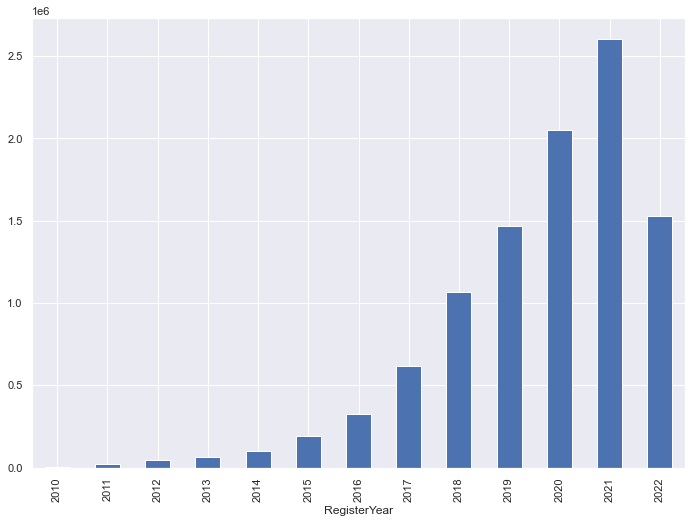

In [8]:
df_users["RegisterDate"] = df_users["RegisterDate"].astype("datetime64")
df_users["RegisterYear"] = df_users["RegisterDate"].dt.year
df_users.groupby(["RegisterYear"])["RegisterYear"].count().plot(kind="bar")

In [9]:
df_users["PerformanceTier"].value_counts()

0    9893236
1     180535
2      11167
3       2096
4        349
5         54
Name: PerformanceTier, dtype: int64

In [10]:
pd.crosstab(df_users['PerformanceTier'], df_users['RegisterYear'])

RegisterYear,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
PerformanceTier,,,,,,,,,,,,,
0,3211,16712,39328,57480,90271,178588,312437,602156,1046156,1441129,2017520,2567425,1520823
1,1094,3696,5859,7505,9995,13716,11569,14629,20003,23739,31838,32268,4624
2,137,270,488,507,684,940,966,1382,1619,1527,1529,1009,109
3,55,114,233,186,206,202,203,272,239,176,140,66,4
4,19,31,35,20,23,43,48,67,27,22,10,3,1
5,2,2,2,1,2,2,2,8,12,5,2,8,6


*PerformanceTier: https://www.kaggle.com/progression*
* 0 = Novice
* 1 = Contributor
* 2 = Expert
* 3 = Master
* 4 = Grandmaster
* 5 = Kaggle Team

In [11]:
df_users_i = df_users[df_users["PerformanceTier"].isin(["1","2","3","4"])]
df_users_i = df_users_i[["Id","UserName","DisplayName","PerformanceTier"]]
df_users_i.rename(columns = {'Id':'UserId'}, inplace = True)
df_users_i["PerformanceTier"].value_counts()

1    180535
2     11167
3      2096
4       349
Name: PerformanceTier, dtype: int64

In [12]:
df_users_i.to_csv(r"../data/interim/Users.csv",index=False)

## User Followers

In [13]:
df_user_followers = pd.read_csv(r"../data/raw/UserFollowers.csv",dtype=str)
df_user_followers.head()

,Id,UserId,FollowingUserId,CreationDate
0,64,368,993,05/23/2017
1,122289,368,67483,08/07/2018
2,323230,368,1663522,09/18/2019
3,412502,368,1302389,03/08/2020
4,447841,368,391404,04/27/2020


* UserId = Seguidor
* FollowingUserId = Usuario Principal

In [14]:
df_user_followers = df_user_followers[["UserId","FollowingUserId"]]
df_user_followers.rename(columns = {'UserId':'FollowerUserId','FollowingUserId':'UserId'}, inplace = True)
df_user_followers.head()

,FollowerUserId,UserId
0,368,993
1,368,67483
2,368,1663522
3,368,1302389
4,368,391404


In [15]:
print(df_user_followers.shape)
print(df_users_i.shape)

(967118, 2)
(194147, 4)


In [16]:
int_df_user_followers = pd.merge(df_users_i, df_user_followers, how='inner', on=['UserId'])
print(int_df_user_followers.shape)

(765508, 5)


In [17]:
df_user_followers_i = int_df_user_followers[["UserId","FollowerUserId"]]
df_user_followers_i.to_csv(r"../data/interim/UserFollowers.csv",index=False)
#df_user_followers.to_csv(r"../data/interim/UserFollowers.csv",index=False)

## User Achievements

In [18]:
df_user_achievements = pd.read_csv(r"../data/raw/UserAchievements.csv",dtype=str)
df_user_achievements.head()

,Id,UserId,AchievementType,Tier,TierAchievementDate,Points,CurrentRanking,HighestRanking,TotalGold,TotalSilver,TotalBronze
0,3739822,1,Discussion,1,11/06/2019,0,NaN,3,0,0,14
1,3916402,1,Competitions,1,11/06/2019,0,NaN,NaN,0,0,0
2,3739823,368,Competitions,1,07/15/2016,232,NaN,75,0,0,0
3,3739824,368,Scripts,2,09/21/2016,41,2054,2005,0,3,13
4,3739825,368,Discussion,2,08/30/2016,218,337,337,14,13,139


In [19]:
df_user_achievements = df_user_achievements[["UserId","AchievementType","TotalGold","TotalSilver","TotalBronze"]]
df_user_achievements.head()

,UserId,AchievementType,TotalGold,TotalSilver,TotalBronze
0,1,Discussion,0,0,14
1,1,Competitions,0,0,0
2,368,Competitions,0,0,0
3,368,Scripts,0,3,13
4,368,Discussion,14,13,139


In [20]:
int_df_user_achievements = pd.merge(df_users_i, df_user_achievements, how='inner', on=['UserId'])
print(int_df_user_achievements.shape)

(776588, 8)


In [21]:
df_user_achievements_i = int_df_user_achievements[["UserId","AchievementType","TotalGold","TotalSilver","TotalBronze"]]

In [22]:
df_user_achievements_i["AchievementType"].unique()

array(['Competitions', 'Scripts', 'Discussion', 'Datasets'], dtype=object)

In [23]:
print(df_user_achievements_i.shape)

(776588, 5)


In [24]:
df_user_achievements_i["TotalGold"] = df_user_achievements_i["TotalGold"].astype(float)
df_user_achievements_i["TotalSilver"] = df_user_achievements_i["TotalSilver"].astype(float)
df_user_achievements_i["TotalBronze"] = df_user_achievements_i["TotalBronze"].astype(float)

df_ach_comp = df_user_achievements_i[df_user_achievements_i["AchievementType"]=="Competitions"]
df_ach_scri = df_user_achievements_i[df_user_achievements_i["AchievementType"]=="Scripts"]
df_ach_disc = df_user_achievements_i[df_user_achievements_i["AchievementType"]=="Discussion"]
df_ach_data = df_user_achievements_i[df_user_achievements_i["AchievementType"]=="Datasets"]

df_ach_comp.drop(['AchievementType'], axis=1,inplace=True)
df_ach_scri.drop(['AchievementType'], axis=1,inplace=True)
df_ach_disc.drop(['AchievementType'], axis=1,inplace=True)
df_ach_data.drop(['AchievementType'], axis=1,inplace=True)

df_ach_comp.rename(columns = {'TotalGold':'TotalGold_Comp','TotalSilver':'TotalSilver_Comp','TotalBronze':'TotalBronze_Comp'}, inplace = True)
df_ach_scri.rename(columns = {'TotalGold':'TotalGold_Scri','TotalSilver':'TotalSilver_Scri','TotalBronze':'TotalBronze_Scri'}, inplace = True)
df_ach_disc.rename(columns = {'TotalGold':'TotalGold_Disc','TotalSilver':'TotalSilver_Disc','TotalBronze':'TotalBronze_Disc'}, inplace = True)
df_ach_data.rename(columns = {'TotalGold':'TotalGold_Data','TotalSilver':'TotalSilver_Data','TotalBronze':'TotalBronze_Data'}, inplace = True)

print(df_ach_comp.shape)
print(df_ach_scri.shape)
print(df_ach_disc.shape)
print(df_ach_data.shape)

(194147, 4)
(194147, 4)
(194147, 4)
(194147, 4)


In [25]:
df_ach_fin = df_ach_comp.merge(df_ach_scri,how ='left',on="UserId").merge(df_ach_disc,how ='left',on="UserId").merge(df_ach_data,how ='left',on="UserId")
df_ach_fin.shape

(194147, 13)

In [26]:
Validator.validar_numerico(df_ach_fin,["TotalGold_Comp","TotalGold_Scri","TotalGold_Disc","TotalGold_Data",
                                     "TotalSilver_Comp","TotalSilver_Scri","TotalSilver_Disc","TotalSilver_Data",
                                     "TotalBronze_Comp","TotalBronze_Scri","TotalBronze_Disc","TotalBronze_Data"
                                     ])

,Variable,n,Missing,%Missing,Negativo,%Negativo,Unico,Media,Min,Max,IQRMAX,3STD,P50,P75,P90,P95,P99,Outlier IQR,%Outlier IQR,Outlier 3SD,%Outlier 3SD,Outlier P90,%Outlier P90,Outlier P95,%Outlier P95,Outlier P99,%Outlier P99
0,TotalGold_Comp,194147,0,0.0,0,0.0,30,0.04,0.0,60.0,0.0,1.37,0.0,0.0,0.0,0.0,1.0,3492,1.80,1108,0.57,3492,1.80,3492,1.80,1108,0.57
0,TotalGold_Scri,194147,0,0.0,0,0.0,36,0.03,0.0,67.0,0.0,1.65,0.0,0.0,0.0,0.0,0.0,1714,0.88,696,0.36,1714,0.88,1714,0.88,1714,0.88
0,TotalGold_Disc,194147,0,0.0,0,0.0,88,0.11,0.0,436.0,0.0,6.77,0.0,0.0,0.0,0.0,2.0,5342,2.75,573,0.30,5342,2.75,5342,2.75,1368,0.70
0,TotalGold_Data,194147,0,0.0,0,0.0,12,0.00,0.0,11.0,0.0,0.29,0.0,0.0,0.0,0.0,0.0,318,0.16,318,0.16,318,0.16,318,0.16,318,0.16
0,TotalSilver_Comp,194147,0,0.0,0,0.0,39,0.13,0.0,59.0,0.0,2.59,0.0,0.0,0.0,1.0,3.0,12656,6.52,2321,1.20,12656,6.52,4624,2.38,1408,0.73
0,TotalSilver_Scri,194147,0,0.0,0,0.0,30,0.05,0.0,52.0,0.0,1.82,0.0,0.0,0.0,0.0,1.0,4020,2.07,1685,0.87,4020,2.07,4020,2.07,1685,0.87
0,TotalSilver_Disc,194147,0,0.0,0,0.0,92,0.15,0.0,560.0,0.0,8.13,0.0,0.0,0.0,0.0,3.0,8364,4.31,586,0.30,8364,4.31,8364,4.31,1544,0.80
0,TotalSilver_Data,194147,0,0.0,0,0.0,15,0.01,0.0,23.0,0.0,0.51,0.0,0.0,0.0,0.0,0.0,673,0.35,673,0.35,673,0.35,673,0.35,673,0.35
0,TotalBronze_Comp,194147,0,0.0,0,0.0,33,0.13,0.0,47.0,0.0,2.18,0.0,0.0,0.0,1.0,3.0,14740,7.59,1995,1.03,14740,7.59,4616,2.38,1117,0.58
0,TotalBronze_Scri,194147,0,0.0,0,0.0,63,0.23,0.0,374.0,0.0,5.21,0.0,0.0,0.0,1.0,5.0,15272,7.87,1910,0.98,15272,7.87,7081,3.65,1910,0.98


In [27]:
df_ach_fin[df_ach_fin["TotalGold_Disc"]==436]

,UserId,TotalGold_Comp,TotalSilver_Comp,TotalBronze_Comp,TotalGold_Scri,TotalSilver_Scri,TotalBronze_Scri,TotalGold_Disc,TotalSilver_Disc,TotalBronze_Disc,TotalGold_Data,TotalSilver_Data,TotalBronze_Data
11790,75976,24.0,24.0,4.0,15.0,8.0,15.0,436.0,560.0,4426.0,0.0,0.0,5.0


In [28]:
df_user_achievements[df_user_achievements["UserId"]=="75976"]

,UserId,AchievementType,TotalGold,TotalSilver,TotalBronze
81190,75976,Competitions,24,24,4
81191,75976,Scripts,15,8,15
81192,75976,Discussion,436,560,4426
11012184,75976,Datasets,0,0,5


In [29]:
df_users_i[df_users_i["UserId"] == "75976"]

,UserId,UserName,DisplayName,PerformanceTier
69052,75976,cpmpml,CPMP,4


In [30]:
df_ach_fin.to_csv(r"../data/interim/UserAchievements.csv",index=False)

## Competitions

In [31]:
df_competitions = pd.read_csv(r"../data/raw/Competitions.csv",dtype=str)

In [32]:
df_competitions.head(5)

,Id,Slug,Title,Subtitle,HostSegmentTitle,ForumId,OrganizationId,CompetitionTypeId,HostName,EnabledDate,DeadlineDate,ProhibitNewEntrantsDeadlineDate,TeamMergerDeadlineDate,TeamModelDeadlineDate,ModelSubmissionDeadlineDate,FinalLeaderboardHasBeenVerified,HasKernels,OnlyAllowKernelSubmissions,HasLeaderboard,LeaderboardPercentage,LeaderboardDisplayFormat,EvaluationAlgorithmAbbreviation,EvaluationAlgorithmName,EvaluationAlgorithmDescription,EvaluationAlgorithmIsMax,ValidationSetName,ValidationSetValue,MaxDailySubmissions,NumScoredSubmissions,MaxTeamSize,BanTeamMergers,EnableTeamModels,EnableSubmissionModelHashes,EnableSubmissionModelAttachments,RewardType,RewardQuantity,NumPrizes,UserRankMultiplier,CanQualifyTiers,TotalTeams,TotalCompetitors,TotalSubmissions
0,2408,Eurovision2010,Forecast Eurovision Voting,This competition requires contestants to forec...,Featured,2,NaN,1,NaN,04/07/2010 07:57:43,05/25/2010 18:00:00,NaN,NaN,NaN,NaN,True,True,False,False,10,0.00000,AE,Absolute Error,Total sum of absolute value of each individual...,False,NaN,NaN,5,5,20,False,False,False,False,USD,1000.0000,1,1,False,22,25,22
1,2435,hivprogression,Predict HIV Progression,This contest requires competitors to predict t...,Featured,1,NaN,1,NaN,04/27/2010 21:29:09,08/02/2010 12:32:00,NaN,NaN,NaN,NaN,True,True,False,True,30,0.00000,MCE,Mean Consequential Error,Averages consequential error (i.e. if predicti...,True,Boolean,"{0, 1}",4,4,20,False,False,False,False,USD,500.0000,1,1,True,107,116,855
2,2438,worldcup2010,World Cup 2010 - Take on the Quants,Quants at Goldman Sachs and JP Morgan have mod...,Featured,NaN,NaN,1,NaN,06/03/2010 08:08:08,06/11/2010 13:29:00,NaN,NaN,NaN,NaN,True,True,False,False,10,0.00000,Custom,Custom Evaluation Metric,A placeholder that indicates a custom algorith...,False,NaN,NaN,5,5,20,False,False,False,False,USD,100.0000,1,0.5,False,0,0,0
3,2439,informs2010,INFORMS Data Mining Contest 2010,The goal of this contest is to predict short t...,Featured,4,NaN,1,NaN,06/21/2010 21:53:25,10/10/2010 02:28:00,NaN,NaN,NaN,NaN,True,True,False,True,10,0.00000,AUC,Area Under Receiver Operating Characteristic C...,Measures discrimination. Calculates how well a...,True,A real number,"(-Infinity, Infinity)",5,5,20,False,False,False,False,USD,0.0000,1,1,True,145,153,1483
4,2442,worldcupconf,World Cup 2010 - Confidence Challenge,The Confidence Challenge requires competitors ...,Featured,3,NaN,1,NaN,06/03/2010 08:08:08,06/11/2010 13:28:00,NaN,NaN,NaN,NaN,True,True,False,False,10,0.00000,Custom,Custom Evaluation Metric,A placeholder that indicates a custom algorith...,False,NaN,NaN,5,5,20,False,False,False,False,USD,100.0000,1,0.5,False,63,64,63


In [33]:
df_competitions[df_competitions["Slug"].str.contains("tabular-playground-series-jan-2022")]

,Id,Slug,Title,Subtitle,HostSegmentTitle,ForumId,OrganizationId,CompetitionTypeId,HostName,EnabledDate,DeadlineDate,ProhibitNewEntrantsDeadlineDate,TeamMergerDeadlineDate,TeamModelDeadlineDate,ModelSubmissionDeadlineDate,FinalLeaderboardHasBeenVerified,HasKernels,OnlyAllowKernelSubmissions,HasLeaderboard,LeaderboardPercentage,LeaderboardDisplayFormat,EvaluationAlgorithmAbbreviation,EvaluationAlgorithmName,EvaluationAlgorithmDescription,EvaluationAlgorithmIsMax,ValidationSetName,ValidationSetValue,MaxDailySubmissions,NumScoredSubmissions,MaxTeamSize,BanTeamMergers,EnableTeamModels,EnableSubmissionModelHashes,EnableSubmissionModelAttachments,RewardType,RewardQuantity,NumPrizes,UserRankMultiplier,CanQualifyTiers,TotalTeams,TotalCompetitors,TotalSubmissions
4973,33101,tabular-playground-series-jan-2022,Tabular Playground Series - Jan 2022,Practice your ML skills on this approachable d...,Playground,1801833,4,1,NaN,01/01/2022 02:37:30,01/31/2022 23:59:00,NaN,NaN,NaN,NaN,True,True,False,True,25,0.00000,SMAPE,SMAPE,Symmetric Mean Absolute Percentage Error,False,NaN,NaN,5,2,3,False,False,False,False,Swag,NaN,1,0,False,1591,1646,16151


In [34]:
df_competitions = df_competitions[["Id","Title","ForumId","TotalTeams"]]
df_competitions.head()

,Id,Title,ForumId,TotalTeams
0,2408,Forecast Eurovision Voting,2,22
1,2435,Predict HIV Progression,1,107
2,2438,World Cup 2010 - Take on the Quants,NaN,0
3,2439,INFORMS Data Mining Contest 2010,4,145
4,2442,World Cup 2010 - Confidence Challenge,3,63


In [35]:
df_competitions["TotalTeams"] = df_competitions["TotalTeams"].astype(int)
Validator.validar_numerico(df_competitions,["TotalTeams"])

,Variable,n,Missing,%Missing,Negativo,%Negativo,Unico,Media,Min,Max,IQRMAX,3STD,P50,P75,P90,P95,P99,Outlier IQR,%Outlier IQR,Outlier 3SD,%Outlier 3SD,Outlier P90,%Outlier P90,Outlier P95,%Outlier P95,Outlier P99,%Outlier P99
0,TotalTeams,5485,0,0.0,0,0.0,584,110.43,0,8751,97.0,1391.08,12.0,40.0,150.0,527.8,2120.48,716,13.05,112,2.04,547,9.97,275,5.01,55,1.0


In [36]:
Validator.validar_categorico(df_competitions,["Id","Title","ForumId"])

,Variable,n,Missing,%Missing,Unico
0,Id,5485,0,0.00,5485
0,Title,5485,0,0.00,5108
0,ForumId,5485,7,0.13,5476


In [37]:
df_competitions.rename(columns = {'Id':'CompetitionId'}, inplace = True)
df_competitions[df_competitions["ForumId"].isna()]

,CompetitionId,Title,ForumId,TotalTeams
2,2438,World Cup 2010 - Take on the Quants,NaN,0
23,2552,UCL CoMPLEX MRes module,NaN,22
24,2554,UCL Applied Machine Learning 2,NaN,16
26,2558,UMICH SI650 - Sentiment Classification,NaN,28
27,2559,Erasmus University Rotterdam - Econometrie 2 ...,NaN,44
88,3273,Price Change Prediction of Electronics in Onli...,NaN,29
94,3321,Getting Started,NaN,0


In [38]:
df_competitions = df_competitions[~df_competitions["ForumId"].isna()]

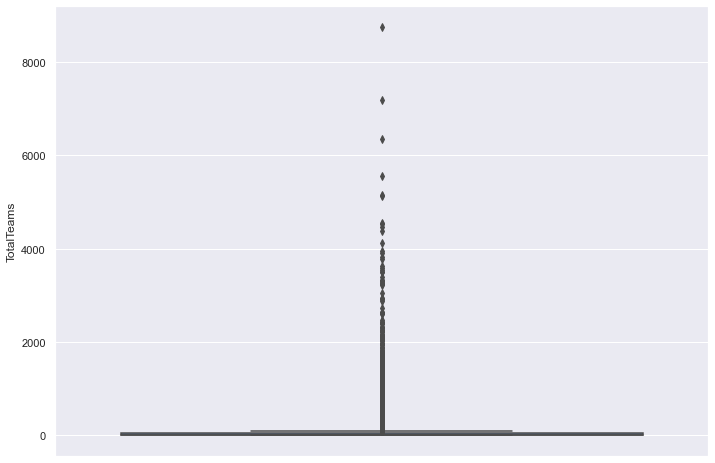

In [39]:
sns.boxplot( y='TotalTeams', data=df_competitions)
plt.show()

In [40]:
df_competitions.head()

,CompetitionId,Title,ForumId,TotalTeams
0,2408,Forecast Eurovision Voting,2,22
1,2435,Predict HIV Progression,1,107
3,2439,INFORMS Data Mining Contest 2010,4,145
4,2442,World Cup 2010 - Confidence Challenge,3,63
5,2445,Predict Grant Applications,30,203


In [41]:
df_competitions.to_csv(r"../data/interim/Competitions.csv",index=False)

## Competitions Tags

In [42]:
df_comp_tags = pd.read_csv(r"../data/raw/CompetitionTags.csv",dtype=str)
df_comp_tags.head()

,Id,CompetitionId,TagId
0,126,3486,14102
1,336,3526,12116
2,335,3526,14101
3,334,3526,14104
4,362,3706,2606


In [43]:
df_comp_tags = df_comp_tags[["CompetitionId","TagId"]]

In [44]:
Validator.validar_categorico(df_comp_tags, ["CompetitionId","TagId"])

,Variable,n,Missing,%Missing,Unico
0,CompetitionId,686,0,0.0,314
0,TagId,686,0,0.0,101


In [45]:
df_comp_tags["TagId"].value_counts()

14101    116
14102    103
14202     44
14104     39
14201     32
        ... 
7105       1
4309       1
12005      1
7307       1
7408       1
Name: TagId, Length: 101, dtype: int64

In [46]:
df_comp_tags.to_csv(r"../data/interim/CompetitionTags.csv",index=False)

## Teams

In [47]:
df_teams = pd.read_csv(r"../data/raw/Teams.csv",dtype=str)
df_teams.head()

,Id,CompetitionId,TeamLeaderId,TeamName,ScoreFirstSubmittedDate,LastSubmissionDate,PublicLeaderboardSubmissionId,PrivateLeaderboardSubmissionId,IsBenchmark,Medal,MedalAwardDate,PublicLeaderboardRank,PrivateLeaderboardRank
0,496,2435,647,team1,NaN,05/04/2010,2192,2192,False,NaN,09/06/2018,59,83
1,497,2435,619,jonp,NaN,04/30/2010,2182,2182,False,3,07/15/2016,41,25
2,499,2435,663,Bwaas,NaN,05/01/2010,2184,2184,False,NaN,09/06/2018,102,100
3,500,2435,673,Thylacoleo,NaN,07/10/2010,2187,2187,False,3,07/15/2016,31,23
4,501,2435,435,pjonesdotcda,NaN,05/05/2010,2194,2191,False,NaN,09/06/2018,67,80


In [48]:
df_teams = df_teams[["Id","CompetitionId","TeamName","Medal","PrivateLeaderboardRank"]]
df_teams.head()

,Id,CompetitionId,TeamName,Medal,PrivateLeaderboardRank
0,496,2435,team1,NaN,83
1,497,2435,jonp,3,25
2,499,2435,Bwaas,NaN,100
3,500,2435,Thylacoleo,3,23
4,501,2435,pjonesdotcda,NaN,80


In [49]:
df_teams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5357344 entries, 0 to 5357343
Data columns (total 5 columns):
 #   Column                  Dtype 
---  ------                  ----- 
 0   Id                      object
 1   CompetitionId           object
 2   TeamName                object
 3   Medal                   object
 4   PrivateLeaderboardRank  object
dtypes: object(5)
memory usage: 204.4+ MB


In [50]:
Validator.validar_categorico(df_teams, ["Medal","PrivateLeaderboardRank"])

,Variable,n,Missing,%Missing,Unico
0,Medal,5357344,5309895,99.11,4
0,PrivateLeaderboardRank,5357344,4743246,88.54,8751


In [51]:
df_teams["Medal"] = df_teams["Medal"].astype(float)
df_teams["PrivateLeaderboardRank"] = df_teams["PrivateLeaderboardRank"].astype(float)
Validator.validar_numerico(df_teams, ["Medal","PrivateLeaderboardRank"])

,Variable,n,Missing,%Missing,Negativo,%Negativo,Unico,Media,Min,Max,IQRMAX,3STD,P50,P75,P90,P95,P99,Outlier IQR,%Outlier IQR,Outlier 3SD,%Outlier 3SD,Outlier P90,%Outlier P90,Outlier P95,%Outlier P95,Outlier P99,%Outlier P99
0,Medal,5357344,5309895,99.11,0,0.0,4,2.42,0.0,3.0,4.5,4.34,3.0,3.0,3.0,3.0,3.0,70,0.00,0,0.00,0,0.00,0,0.00,0,0.00
0,PrivateLeaderboardRank,5357344,4743246,88.54,0,0.0,8751,894.14,1.0,8751.0,2922.0,4347.09,472.0,1230.0,2366.0,3229.0,5424.0,40060,0.75,12528,0.23,61389,1.15,30701,0.57,6140,0.11


In [52]:
df_teams.rename(columns = {'Id':'TeamId'}, inplace = True)
df_teams.head()


,TeamId,CompetitionId,TeamName,Medal,PrivateLeaderboardRank
0,496,2435,team1,NaN,83.0
1,497,2435,jonp,3.0,25.0
2,499,2435,Bwaas,NaN,100.0
3,500,2435,Thylacoleo,3.0,23.0
4,501,2435,pjonesdotcda,NaN,80.0


In [53]:
df_teams.to_csv(r"../data/interim/Teams.csv",index=False)

## Team Memberships

In [54]:
df_team_member = pd.read_csv(r"../data/raw/TeamMemberships.csv",dtype=str)
df_team_member.head()

,Id,TeamId,UserId,RequestDate
0,16458,518,635,NaN
1,16464,526,839,NaN
2,16465,527,816,NaN
3,16466,528,778,NaN
4,16467,529,747,NaN


In [55]:
df_team_member = df_team_member[["TeamId","UserId"]]
df_team_member.head()

,TeamId,UserId
0,518,635
1,526,839
2,527,816
3,528,778
4,529,747


In [56]:
Validator.validar_categorico(df_team_member, ['TeamId', 'UserId'])

,Variable,n,Missing,%Missing,Unico
0,TeamId,5478304,0,0.0,5327693
0,UserId,5478304,0,0.0,1971901


In [57]:
df_team_member.to_csv(r"../data/interim/TeamMemberships.csv",index=False)

## Tags

In [58]:
df_tags = pd.read_csv(r"../data/raw/Tags.csv",dtype=str)
df_tags.head()

,Id,ParentTagId,Name,Slug,FullPath,Description,DatasetCount,CompetitionCount,KernelCount
0,1115,12116,websites,web-sites,subject > science and technology > internet > ...,"Websites, like this one, are collections of co...",215,0,186
1,1219,12000,research,research,subject > science and technology > research,Research is our endeavor to systematically inc...,342,6,249
2,1220,12116,search engines,search-engines,subject > science and technology > internet > ...,NaN,56,0,69
3,1222,11105,universities and colleges,universities-and-colleges,subject > people and society > education > uni...,This tag contains all kinds of information abo...,3469,0,383
4,2100,16637,culture and humanities,culture-and-humanities,subject > culture and humanities,What is it to be human? What activities and pa...,174,0,62


In [59]:
df_tags = df_tags[["Id","ParentTagId","Name"]]
df_tags.rename(columns = {'Id':'TagId'}, inplace = True)
df_tags.head()

,TagId,ParentTagId,Name
0,1115,12116,websites
1,1219,12000,research
2,1220,12116,search engines
3,1222,11105,universities and colleges
4,2100,16637,culture and humanities


In [60]:
Validator.validar_categorico(df_tags, ["TagId","ParentTagId","Name"])

,Variable,n,Missing,%Missing,Unico
0,TagId,320,0,0.00,320
0,ParentTagId,320,7,2.19,60
0,Name,320,0,0.00,320


In [61]:
df_tags.to_csv(r"../data/interim/Tags.csv",index=False)

## Datasets

In [62]:
df_datasets = pd.read_csv(r"../data/raw/Datasets.csv",dtype=str)
df_datasets.head()

,Id,CreatorUserId,OwnerUserId,OwnerOrganizationId,CurrentDatasetVersionId,CurrentDatasourceVersionId,ForumId,Type,CreationDate,LastActivityDate,TotalViews,TotalDownloads,TotalVotes,TotalKernels
0,17,993,NaN,3,742210,762847,989,2,01/07/2016 00:38:08,02/06/2018,506268,70079,911,422
1,19,1,NaN,7,420,420,997,2,01/12/2016 00:33:31,02/06/2018,1163503,292786,2997,5731
2,26,553913,553913,NaN,793501,815299,1110,2,03/08/2016 22:41:02,02/05/2018,67812,9658,266,143
3,28,1132983,NaN,223,3144,3144,1116,2,03/10/2016 04:37:43,02/06/2018,159067,18246,320,194
4,53,627861,NaN,621,102,102,1318,2,06/03/2016 00:27:28,02/04/2018,49998,4887,89,156


In [63]:
df_datasets = df_datasets[["Id","ForumId","Type","TotalViews","TotalDownloads"]]
df_datasets.head()

,Id,ForumId,Type,TotalViews,TotalDownloads
0,17,989,2,506268,70079
1,19,997,2,1163503,292786
2,26,1110,2,67812,9658
3,28,1116,2,159067,18246
4,53,1318,2,49998,4887


In [64]:
df_datasets["Type"].value_counts()

2    160934
Name: Type, dtype: int64

In [65]:
df_datasets = df_datasets[["Id","ForumId","TotalViews","TotalDownloads"]]
df_datasets.rename(columns={"Id":"DatasetId"},inplace=True)
df_datasets.head()

,DatasetId,ForumId,TotalViews,TotalDownloads
0,17,989,506268,70079
1,19,997,1163503,292786
2,26,1110,67812,9658
3,28,1116,159067,18246
4,53,1318,49998,4887


In [66]:
Validator.validar_categorico(df_datasets, ["DatasetId","ForumId"])

,Variable,n,Missing,%Missing,Unico
0,DatasetId,160934,0,0.0,160934
0,ForumId,160934,0,0.0,160934


In [67]:
df_datasets["TotalViews"] = df_datasets["TotalViews"].astype(int)
df_datasets["TotalDownloads"] = df_datasets["TotalDownloads"].astype(int)
Validator.validar_numerico(df_datasets, ["TotalViews","TotalDownloads"])

,Variable,n,Missing,%Missing,Negativo,%Negativo,Unico,Media,Min,Max,IQRMAX,3STD,P50,P75,P90,P95,P99,Outlier IQR,%Outlier IQR,Outlier 3SD,%Outlier 3SD,Outlier P90,%Outlier P90,Outlier P95,%Outlier P95,Outlier P99,%Outlier P99
0,TotalViews,160934,0,0.0,0,0.0,11378,2287.70,0,9282156,1592.5,103477.27,319.0,721.0,2196.0,5004.0,30588.85,20615,12.81,461,0.29,16091,10.00,8046,5.0,1610,1.0
0,TotalDownloads,160934,0,0.0,0,0.0,4140,253.17,0,422666,75.0,11219.89,4.0,30.0,173.0,488.0,3679.67,25664,15.95,562,0.35,16035,9.96,8046,5.0,1610,1.0


In [68]:
df_datasets.to_csv(r"../data/interim/Datasets.csv",index=False)

## Dataset Tags

In [69]:
df_dataset_tags = pd.read_csv(r"../data/raw/DatasetTags.csv",dtype=str)
df_dataset_tags.head()

,Id,DatasetId,TagId
0,1879,2234,1115
1,2182,2482,1115
2,2408,2700,1115
3,3756,8095,1115
4,5942,22268,1115


In [70]:
df_dataset_tags = df_dataset_tags[["DatasetId","TagId"]]
Validator.validar_categorico(df_dataset_tags, df_dataset_tags.columns)

,Variable,n,Missing,%Missing,Unico
0,DatasetId,159431,0,0.0,72030
0,TagId,159431,0,0.0,297


In [71]:
df_dataset_tags.to_csv(r"../data/interim/DatasetTags.csv",index=False)

## Forums

In [72]:
df_forums = pd.read_csv(r"../data/raw/Forums.csv",dtype=str)
df_forums.head()

,Id,ParentForumId,Title
0,1,8,Predict HIV Progression
1,2,8,Forecast Eurovision Voting
2,3,8,World Cup 2010 - Take on the Quants
3,4,8,INFORMS Data Mining Contest 2010
4,5,NaN,Active Competitions


In [73]:
df_forums.rename(columns={"Id":"ForumId"},inplace=True)
Validator.validar_categorico(df_forums, df_forums.columns)

,Variable,n,Missing,%Missing,Unico
0,ForumId,165177,0,0.00,165177
0,ParentForumId,165177,25,0.02,8
0,Title,165177,188,0.11,150756


In [74]:
df_forums[df_forums["ParentForumId"].isna()].head()

,ForumId,ParentForumId,Title
4,5,NaN,Active Competitions
5,8,NaN,Past Competitions
6,9,NaN,General
319,1023,NaN,Public Datasets
4711,16860,NaN,Notebooks


In [75]:
df_forums.to_csv(r"../data/interim/Forums.csv",index=False)

## ForumsTopics

In [76]:
df_forum_topics = pd.read_csv(r"../data/raw/ForumTopics.csv",dtype=str)
df_forum_topics.head()

,Id,ForumId,KernelId,LastForumMessageId,FirstForumMessageId,CreationDate,LastCommentDate,Title,IsSticky,TotalViews,Score,TotalMessages,TotalReplies
0,1,1,NaN,212,1,04/28/2010 23:13:08,04/28/2010 23:13:08,A few techniques you might try:,False,9405,0,19,18
1,2,1,NaN,4,2,04/29/2010 15:48:46,04/29/2010 15:48:46,Question regarding algorithms used,False,2185,0,3,2
2,3,1,NaN,41,5,04/30/2010 14:32:29,04/30/2010 14:32:29,Question about data,False,2121,0,3,2
3,4,1,NaN,13,6,04/30/2010 15:40:57,04/30/2010 15:40:57,Biased sets,False,2780,1,4,3
4,5,1,NaN,12,10,05/01/2010 11:00:57,05/01/2010 11:00:57,Non-standard nucleotide codings,False,2045,0,2,1


In [77]:
df_forum_topics[df_forum_topics["ForumId"]=="44"].head()

,Id,ForumId,KernelId,LastForumMessageId,FirstForumMessageId,CreationDate,LastCommentDate,Title,IsSticky,TotalViews,Score,TotalMessages,TotalReplies
21470,667,44,NaN,4378,4377,06/28/2011 17:11:36,06/28/2011 17:18:54,1.47708,False,3149,0,2,1
21471,668,44,NaN,4552,4379,06/28/2011 18:23:40,07/12/2011 16:16:09,Importing the data into SQL Server,False,10989,5,15,14
21472,674,44,NaN,4449,4412,07/01/2011 05:18:08,07/04/2011 22:05:13,Sampling approach,False,8146,2,15,14
21473,675,44,NaN,4664,4431,07/03/2011 08:52:55,07/20/2011 16:39:47,Validation dataset?,False,8326,4,13,12
21474,670,44,NaN,4386,4385,06/29/2011 20:05:01,06/29/2011 20:19:04,Error evaluation,False,4453,0,2,1


In [78]:
df_competitions[df_competitions["Title"].str.contains("Google Smartphone")]

,CompetitionId,Title,ForumId,TotalTeams
4054,26933,Google Smartphone Decimeter Challenge,1355813,810


In [79]:
df_datasets[df_datasets["ForumId"]=="1355813"]

,DatasetId,ForumId,TotalViews,TotalDownloads


In [80]:
df_forums[df_forums["ForumId"]=="1355813"]

,ForumId,ParentForumId,Title
89792,1355813,8,Google Smartphone Decimeter Challenge


In [81]:
df_forum_topics = df_forum_topics[["Id","ForumId","Title","TotalViews","TotalMessages","Score"]]
df_forum_topics.rename(columns={"Id":"ForumTopicId"},inplace=True)
df_forum_topics.head()

,ForumTopicId,ForumId,Title,TotalViews,TotalMessages,Score
0,1,1,A few techniques you might try:,9405,19,0
1,2,1,Question regarding algorithms used,2185,3,0
2,3,1,Question about data,2121,3,0
3,4,1,Biased sets,2780,4,1
4,5,1,Non-standard nucleotide codings,2045,2,0


In [82]:
df_forum_topics["TotalViews"] = df_forum_topics["TotalViews"].astype(float)
df_forum_topics["TotalMessages"] = df_forum_topics["TotalMessages"].astype(float)
df_forum_topics["Score"] = df_forum_topics["Score"].astype(float)
Validator.validar_numerico(df_forum_topics, ["TotalViews","TotalMessages","Score"])

,Variable,n,Missing,%Missing,Negativo,%Negativo,Unico,Media,Min,Max,IQRMAX,3STD,P50,P75,P90,P95,P99,Outlier IQR,%Outlier IQR,Outlier 3SD,%Outlier 3SD,Outlier P90,%Outlier P90,Outlier P95,%Outlier P95,Outlier P99,%Outlier P99
0,TotalViews,265031,0,0.0,0,0.00,5618,161.80,0.0,301527.0,0.0,4487.30,0.0,0.0,0.0,552.0,3759.0,18453,6.96,2094,0.79,18453,6.96,13249,5.00,2650,1.00
0,TotalMessages,265031,0,0.0,0,0.00,334,6.08,0.0,26084.0,13.5,170.98,3.0,6.0,12.0,20.0,53.0,23134,8.73,286,0.11,25534,9.63,12807,4.83,2571,0.97
0,Score,265031,0,0.0,2516,0.95,757,10.97,-255.0,12077.0,22.5,193.85,2.0,9.0,24.0,42.0,128.0,27929,10.54,1374,0.52,25372,9.57,12939,4.88,2646,1.00


In [83]:
df_forum_topics[df_forum_topics["Score"]<0].head()

,ForumTopicId,ForumId,Title,TotalViews,TotalMessages,Score
384,12892,15,March machine learning mania competition,325.0,3.0,-1.0
400,11380,15,Email Analytics,554.0,1.0,-3.0
484,10389,15,My account is blocked because I mistakenly tri...,1125.0,2.0,-6.0
491,10440,15,"Sat, Sept 27: Data Mining Quickstart and Hands...",630.0,1.0,-4.0
492,10442,15,Webinar: Evolution of Classification- Logistic...,1435.0,1.0,-5.0


In [84]:
Validator.validar_categorico(df_forum_topics, ["ForumId","Title"])

,Variable,n,Missing,%Missing,Unico
0,ForumId,265031,0,0.00,8201
0,Title,265031,64896,24.49,181889


In [85]:
df_forum_topics.to_csv(r"../data/interim/ForumTopics.csv",index=False)

## Forum Messages

In [86]:
df_forum_messages = pd.read_csv(r"../data/raw/ForumMessages.csv",dtype=str)
df_forum_messages.head()

,Id,ForumTopicId,PostUserId,PostDate,ReplyToForumMessageId,Message,Medal,MedalAwardDate
0,1,1,478,04/28/2010 23:13:08,NaN,<div>In response to a comment on the No Free H...,NaN,NaN
1,2,2,606,04/29/2010 15:48:46,NaN,"Hi, I'm interested in participating in the con...",NaN,NaN
2,3,2,478,04/29/2010 15:48:46,NaN,"Tanya,<div><br></div><div>Good to hear from yo...",NaN,NaN
3,4,2,368,04/29/2010 15:48:46,NaN,"Hi Tanya, <br><br>Kaggle will maintain a ratin...",NaN,NaN
4,5,3,634,04/30/2010 14:32:29,NaN,"Hi,<br><br>I just read in csv files and I've g...",NaN,NaN


In [87]:
df_forum_messages.shape

(1572363, 8)

In [88]:
df_forum_messages[df_forum_messages["ForumTopicId"]=="255635"]

,Id,ForumTopicId,PostUserId,PostDate,ReplyToForumMessageId,Message,Medal,MedalAwardDate
1210593,1402736,255635,1178699,07/28/2021 13:51:41,NaN,"<p>Hi Kagglers,</p>\n<h4>TL;DR</h4>\n<p><code>...",3,07/28/2021
1210652,1402801,255635,4051350,07/28/2021 14:43:24,1402736,"<p>Dear <a href=""https://www.kaggle.com/jplott...",3,07/29/2021
1211756,1404038,255635,347463,07/29/2021 14:10:39,1402736,<p>I think I'm that 1% - I've tried using that...,3,07/29/2021
1212975,1405368,255635,1178699,07/30/2021 18:55:35,1402801,"<p>Hi <a href=""https://www.kaggle.com/carlmcbr...",3,07/30/2021


In [89]:
df_forum_messages = df_forum_messages[["ForumTopicId","PostUserId","Medal"]]
df_forum_messages.rename(columns={"PostUserId":"UserId"},inplace=True)
df_forum_messages.head()

,ForumTopicId,UserId,Medal
0,1,478,NaN
1,2,606,NaN
2,2,478,NaN
3,2,368,NaN
4,3,634,NaN


In [90]:
int_df_forum_messages = pd.merge(df_users_i, df_forum_messages, how='inner', on=['UserId'])
print(int_df_forum_messages.shape)

(1308300, 6)


In [91]:
df_forum_messages = int_df_forum_messages[["ForumTopicId","UserId","Medal"]]
df_forum_messages[df_forum_messages["Medal"]=="1"].head()

,ForumTopicId,UserId,Medal
412,35977,368,1
418,45770,368,1
423,52692,368,1
424,52852,368,1
425,52852,368,1


In [92]:
df_forum_messages["Medal"] = df_forum_messages["Medal"].astype(float)
Validator.validar_numerico(df_forum_messages, ["Medal"])

,Variable,n,Missing,%Missing,Negativo,%Negativo,Unico,Media,Min,Max,IQRMAX,3STD,P50,P75,P90,P95,P99,Outlier IQR,%Outlier IQR,Outlier 3SD,%Outlier 3SD,Outlier P90,%Outlier P90,Outlier P95,%Outlier P95,Outlier P99,%Outlier P99
0,Medal,1308300,721545,55.15,0,0.0,3,2.89,1.0,3.0,3.0,4.11,3.0,3.0,3.0,3.0,3.0,47150,3.6,0,0.0,0,0.0,0,0.0,0,0.0


In [93]:
df_forum_messages.head()

,ForumTopicId,UserId,Medal
0,2,368,NaN
1,16,368,NaN
2,16,368,NaN
3,20,368,NaN
4,20,368,NaN


In [94]:
df_forum_messages.to_csv(r"../data/interim/ForumMessages.csv",index=False)